In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
bc = load_breast_cancer()
X = pd.DataFrame(bc['data'], columns=bc['feature_names'])
Y = bc['target']
eps = 1e-18

In [43]:
R = np.transpose(np.asmatrix(X)) * np.asmatrix(X)
val, vec = np.linalg.eigh(R)
D = np.diag(1.0 / (val + eps)**0.5)
W = np.dot(np.dot(vec, D), np.transpose(vec))
whiteX = np.dot(X, W) * len(X)**0.5

wR = np.transpose(whiteX) * whiteX
wval, wvec = np.linalg.eigh(wR)
best_vectors = [np.squeeze(np.asarray(wvec[-i])) for i in [1, 2, 3]]

In [44]:
white_projections = np.empty([len(whiteX), 3])
for i in range(len(X)):
    x = np.squeeze(np.asarray(whiteX[i]))
    white_projections[i][0] = np.dot(x, best_vectors[0])
    white_projections[i][1] = np.dot(x, best_vectors[1])
    white_projections[i][2] = np.dot(x, best_vectors[2])

white_proj_df = pd.DataFrame(white_projections, columns=['V1', 'V2', 'V3'])

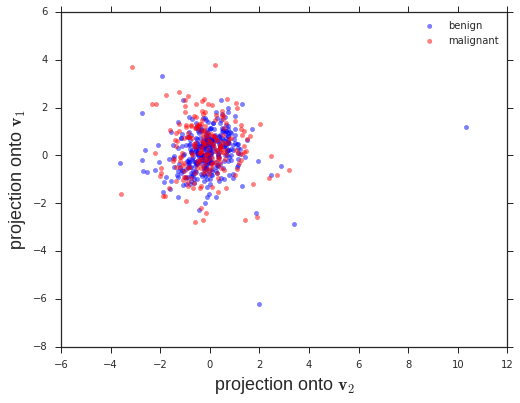

In [46]:
malignant = white_proj_df[Y == 0]
benign = white_proj_df[Y == 1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(benign['V1'], benign['V2'], label='benign', color='blue', alpha=0.5)
ax.scatter(malignant['V1'], malignant['V2'], label='malignant', color='red', alpha=0.5)
plt.xlabel(r'projection onto $\mathbf{v}_2$', fontsize=18)
plt.ylabel(r'projection onto $\mathbf{v}_1$', fontsize=18)
ax.legend(loc='best')
plt.show()

In [47]:
normal_projections = np.empty([len(X), 3])
for i in range(len(X)):
    x = np.squeeze(np.asarray(X.loc[[i]]))
    normal_projections[i][0] = np.dot(x, best_vectors[0])
    normal_projections[i][1] = np.dot(x, best_vectors[1])
    normal_projections[i][2] = np.dot(x, best_vectors[2])

norm_proj_df = pd.DataFrame(normal_projections, columns=['V1', 'V2', 'V3'])

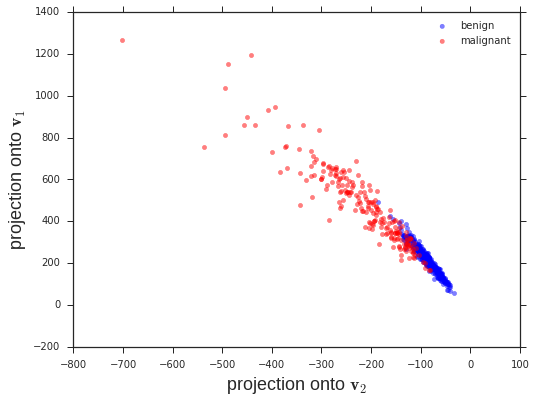

In [48]:
malignant = norm_proj_df[Y == 0]
benign = norm_proj_df[Y == 1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(benign['V1'], benign['V2'], label='benign', color='blue', alpha=0.5)
ax.scatter(malignant['V1'], malignant['V2'], label='malignant', color='red', alpha=0.5)
plt.xlabel(r'projection onto $\mathbf{v}_2$', fontsize=18)
plt.ylabel(r'projection onto $\mathbf{v}_1$', fontsize=18)
ax.legend(loc='best')
plt.show()

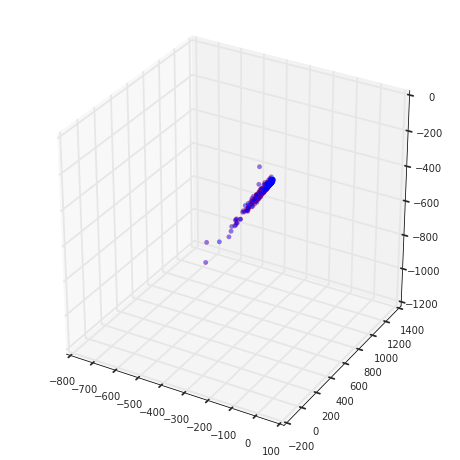

In [51]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(benign['V1'], benign['V2'], benign['V3'], label='benign', color='blue', alpha=0.5)
ax.scatter(malignant['V1'], malignant['V2'], malignant['V3'], label='malignant', color='red', alpha=0.5)

plt.show()

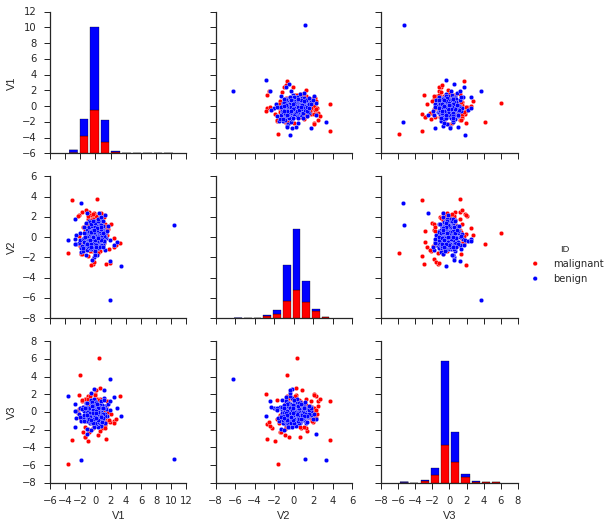

In [53]:
import seaborn as sns
sns.set(style="ticks")

white_proj_df['ID'] = np.asarray(['malignant' if i==0 else 'benign' for i in Y])
sns.pairplot(white_proj_df, vars=['V1', 'V2', 'V3'], hue="ID", palette=['red', 'blue'])
plt.show()

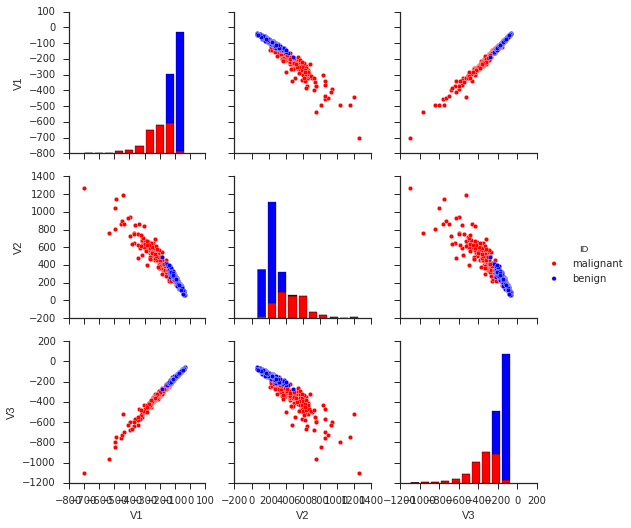

In [54]:
norm_proj_df['ID'] = np.asarray(['malignant' if i==0 else 'benign' for i in Y])
sns.pairplot(norm_proj_df, vars=['V1', 'V2', 'V3'], hue="ID", palette=['red', 'blue'])
plt.show()